# مدل های درخت محور 
این الگوریتم ها هم برای مسائل با خروجی **گسسته** و هم برای مسائل با خروجی **پیوسته** می تونن استفاده بشن

## Decision Trees
درخت تصمیم حالت ساده تری از الگوریتم های درخت محوره که دیگه **کمتر** ازشون استفاده میشه اما پایه ای برای یادگیری باقی الگوریتم هاست
<br>

یه نکته، این الگوریتم با الگوریتم درخت تصمیم که در صنایع باهاش آشنا شدی و دارای احتمال بود **متفاوته**

<br>

##### چند تا اصطلاح در این الگوریتم وجود داره
<br>

**node** : یا گره

<br>

**leaf** : آخرین سطح از درخت در هر مسیر که خروجی نهایی رو انتخاب می کنه

<br>

**Pruning**: یعنی درختمون رو از یه جایی به بعد محدود کنیم یا ببریم! به طوری که از اوور فیت شدن جلوگیری کنیم

<br>

**spliting**: یا **جدا سازی** به این صورت هست که 

<br>

**gini impurity**: برای هر گره حساب می شه و در نهایت کمترین اون به عنوان **اولویت** برای جداسازی استفاده می شه

<br>
روش محاسبه اون به صورت زیر هست


<img src="Gini Impurity.PNG">
<br>
<br>
<br>

می تونیم برای این پارامتر و جلوگیری از اوور فیتینگ **حد** هم تعیین کنیم، به این صورت که اگر از فلان قدر کمتر شد دیگه ادامه نده و اون رو سطح آخر در نظر بگیر

<br>

برای این الگوریتم ها **داده ها اعم از ورودی و خروجی حتما باید از جنس عدد** باشند اما خروجی می تونه متنی هم باشه


<br>

الگوریتم های درخت تصمیم نیازی به
<br>

**FeatureScaling**
<br>
ندارند


<br> 

در نهایت و زمانی که درخت رسم شد، هر چه فیچر **جایگاه بالاتری** از درخت را داشته باشد، اهمیت آن و تاثیر گذاری آن در مدل بیشتر می باشد



## فراخوانی کتابخانه ها

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## درباره دیتا

دیتاست مربوط به گروهی از پنگوئن ها با ویژگی های مختلف است که توسط گورمن ویلیامز! در سال 2014 جمع آوری شده است. هدف از این مسئله پیشبینی گونه پنگوئن ها با توجه به این ویژگی های متفاوت است


<img src="penguin.jpg" style="max-width:400px">


در ارتباط به ستون ها اطلاعات تفضیلی به شرح زیر آورده شده است
    * species: penguin species (Chinstrap, Adélie, or Gentoo)
    * culmen_length_mm: culmen length (mm)
    * culmen_depth_mm: culmen depth (mm)
    * flipper_length_mm: flipper length (mm)
    * body_mass_g: body mass (g)
    * island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    * sex: penguin sex



In [2]:
df = pd.read_csv("../DATA/penguins_size.csv")

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## EDA

### دیتا های گم شده

با توجه به دستور زیر، متوجه می شویم در بعضی از ستون ها داده های گم شده یا نال یافت می شود. با توجه به کم بودن تعداد آن ها تصمیم به حذف آن ها می گیریم

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
# چند درصد از داده ها قرار است حدف بشوند؟
100*(10/344)

2.9069767441860463

In [7]:
df = df.dropna()

مشاهده می کنیم که داده های نال از دیتا ست با موفقیت خدف شده اند

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [10]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


## EDA

### دیتا های به اشتباه وارد شده

با دریافت مقادیر واحد ستون مربوط به جنسیت، متوجه می شویم یک مقدار به صورت نقطه و به اشتباه وارد شده است

In [16]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [15]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [18]:
df[df['sex']=='.'] 

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


چطوری می تونیم این این نقطه رو با یه مقدار صحیح عوض کنیم؟
با گروپ بای

In [22]:
df[df['species']=='Gentoo'].groupby('sex').describe().transpose()

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

با مقایسه ویژگی های مختلف از مونت بودن جنسیت پنگوئن مذکون اطمینان حاصل می کنیم
<br>
برای تغییر دیتای معیوب به مذکر می توانیم از دستور زیر استفاده کنیم. البته این دستور برای زمانی است که از شماره ردیف دیتای معیوب اطلاع پیدا کردیم

In [24]:
df.at[336,'sex'] = 'FEMALE'

In [29]:
df.loc[336,:]

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm       217
body_mass_g            4875
sex                  FEMALE
Name: 336, dtype: object

## EDA

### مصور سازی

با مصور سازی داده ها به اطلاعات بیشتری در داده ها از جمله وجود سه کلاس متفاوت پی می بریم

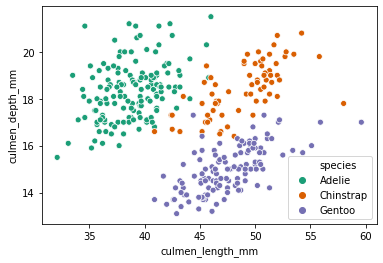

In [30]:
sns.scatterplot(x='culmen_length_mm',y='culmen_depth_mm',data=df,hue='species',palette='Dark2')

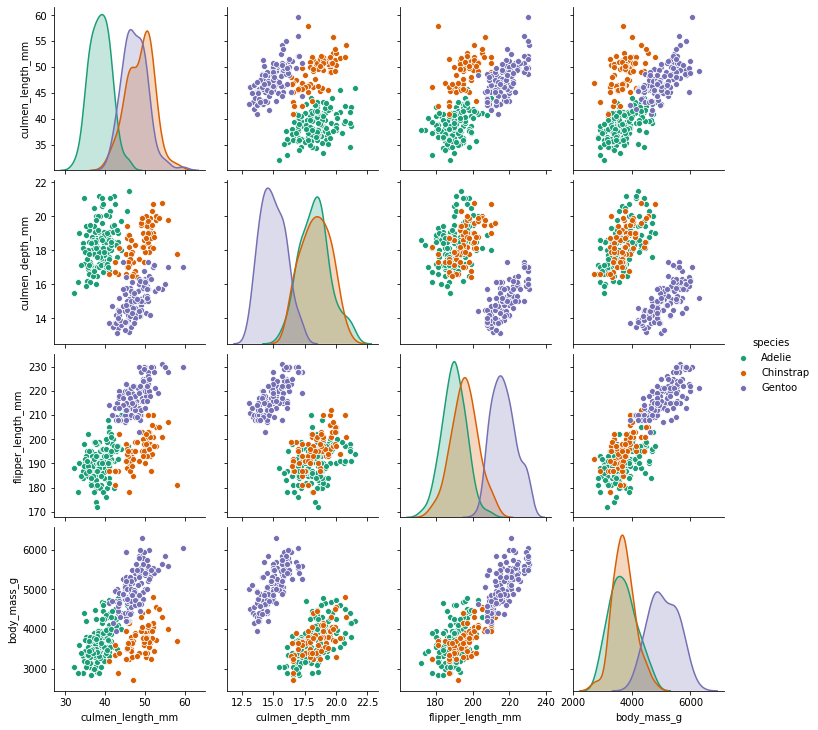

In [31]:
sns.pairplot(df,hue='species',palette='Dark2')

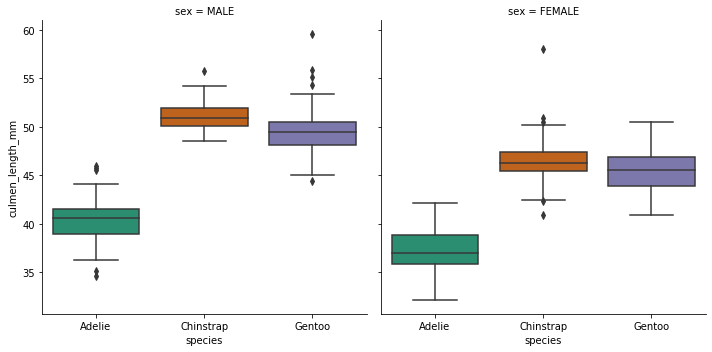

In [32]:
sns.catplot(x='species',y='culmen_length_mm',data=df,kind='box',col='sex',palette='Dark2')

## Feature Engineering
## مهندسی فیچر ها
همان طور که پیشتر اشاره شد، در الگوریتم درخت تصمیم داده  ها باید به صورت عددی باشند برای این منظور از تابع زیر استفاده می کنیم

In [35]:
pd.get_dummies(df)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,1,1,0,0,1,0
340,46.8,14.3,215.0,4850.0,0,0,1,1,0,0,1,0
341,50.4,15.7,222.0,5750.0,0,0,1,1,0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,1,1,0,0,1,0


In [36]:
pd.get_dummies(df.drop('species',axis=1),drop_first=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


## تعیین متغیر های ورودی و خروجی

متغیر های مسئله به همراه خروجی را در داده ها مشخص می کنیم

In [37]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

## Train | Test Split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Decision Tree Classifier

## پیاده سازی مدل با پارامتر های پیشفرض

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
model = DecisionTreeClassifier()

In [42]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [43]:
base_pred = model.predict(X_test)

## ارزیابی مدل پیاده سازی شده

In [44]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [45]:
confusion_matrix(y_test,base_pred)

array([[40,  1,  0],
       [ 3, 20,  0],
       [ 0,  0, 37]], dtype=int64)

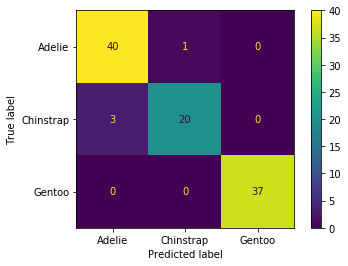

In [46]:
plot_confusion_matrix(model,X_test,y_test)

In [47]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

      Adelie       0.93      0.98      0.95        41
   Chinstrap       0.95      0.87      0.91        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.96       101
   macro avg       0.96      0.95      0.95       101
weighted avg       0.96      0.96      0.96       101



**یه نکته خیلی مهم، با این دستور می تونیم متوجه این بشیم که کدام فیچر ها در داده ها اهمیت بیشتری دارند**

In [49]:
model.feature_importances_

array([0.32352044, 0.05221421, 0.55368219, 0.00239775, 0.0681854 ,
       0.        , 0.        ])

In [50]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
culmen_length_mm,0.323520
culmen_depth_mm,0.052214
flipper_length_mm,0.553682
body_mass_g,0.002398
island_Dream,0.068185
island_Torgersen,0.000000
sex_MALE,0.000000


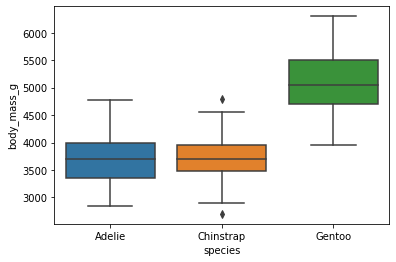

In [51]:
sns.boxplot(x='species',y='body_mass_g',data=df)

## مصور سازی درخت مدل پیاده سازی شده



In [52]:
from sklearn.tree import plot_tree

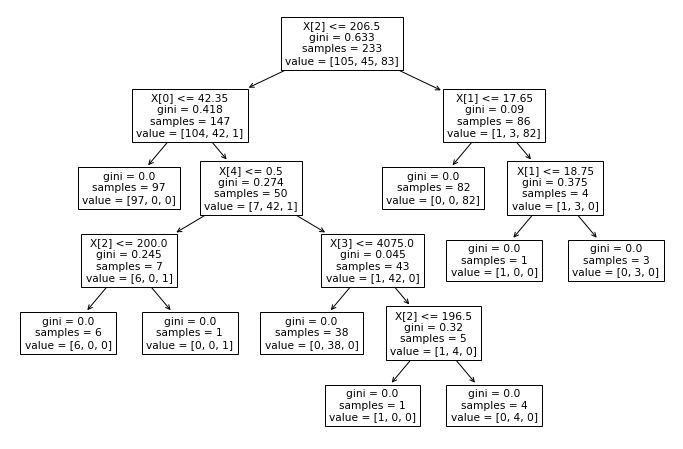

In [53]:
plt.figure(figsize=(12,8))
plot_tree(model);

به این صورت درخت رسم شده را با کیفیت تر و رنگی می کنیم

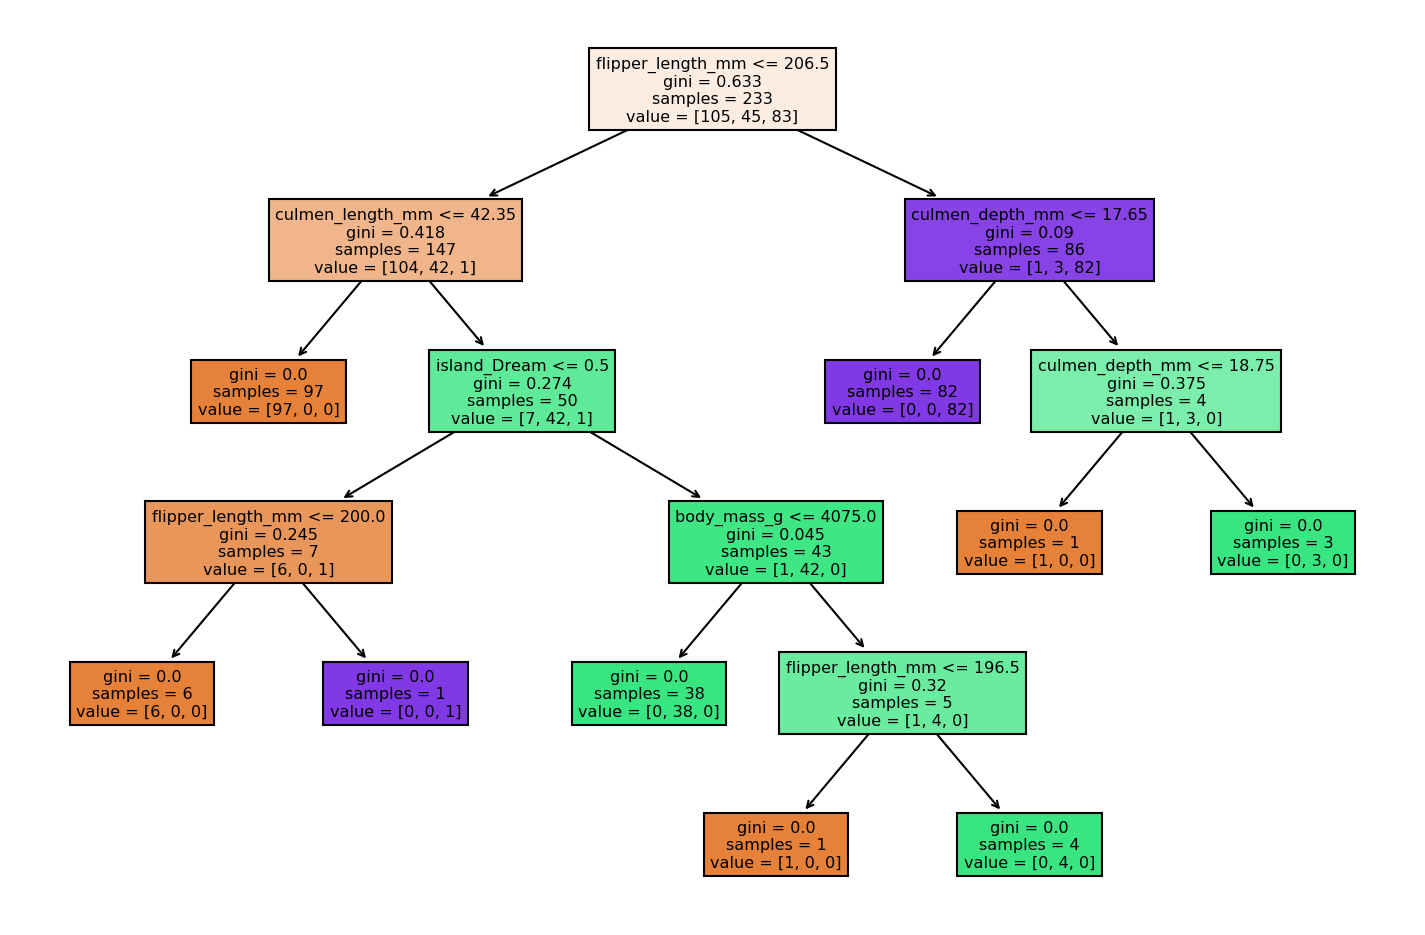

In [54]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,filled=True,feature_names=X.columns);

## ساخت تابع برای خوکار سازی عملیات ارزیابی و رسم درخت
 برای این که بتونیم راحت تر مدل های دیگه رو فیت و ارزیابی کنیم، این تابع رو تعریف و در ادامه ازش استفاده می کنیم

In [55]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);

## آشنایی با برخی پارامتر های الگوریتم درخت تصمیم

### Max Depth
این پارامتر، تعیین بیشترین تعداد سطوح می باشد که هر چه کمتر باشد از اوور فیت شدن بیشتر جلوگیری می شود

In [57]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 

In [58]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.81      0.96      0.88        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.93      0.94      0.93       101
weighted avg       0.95      0.94      0.94       101





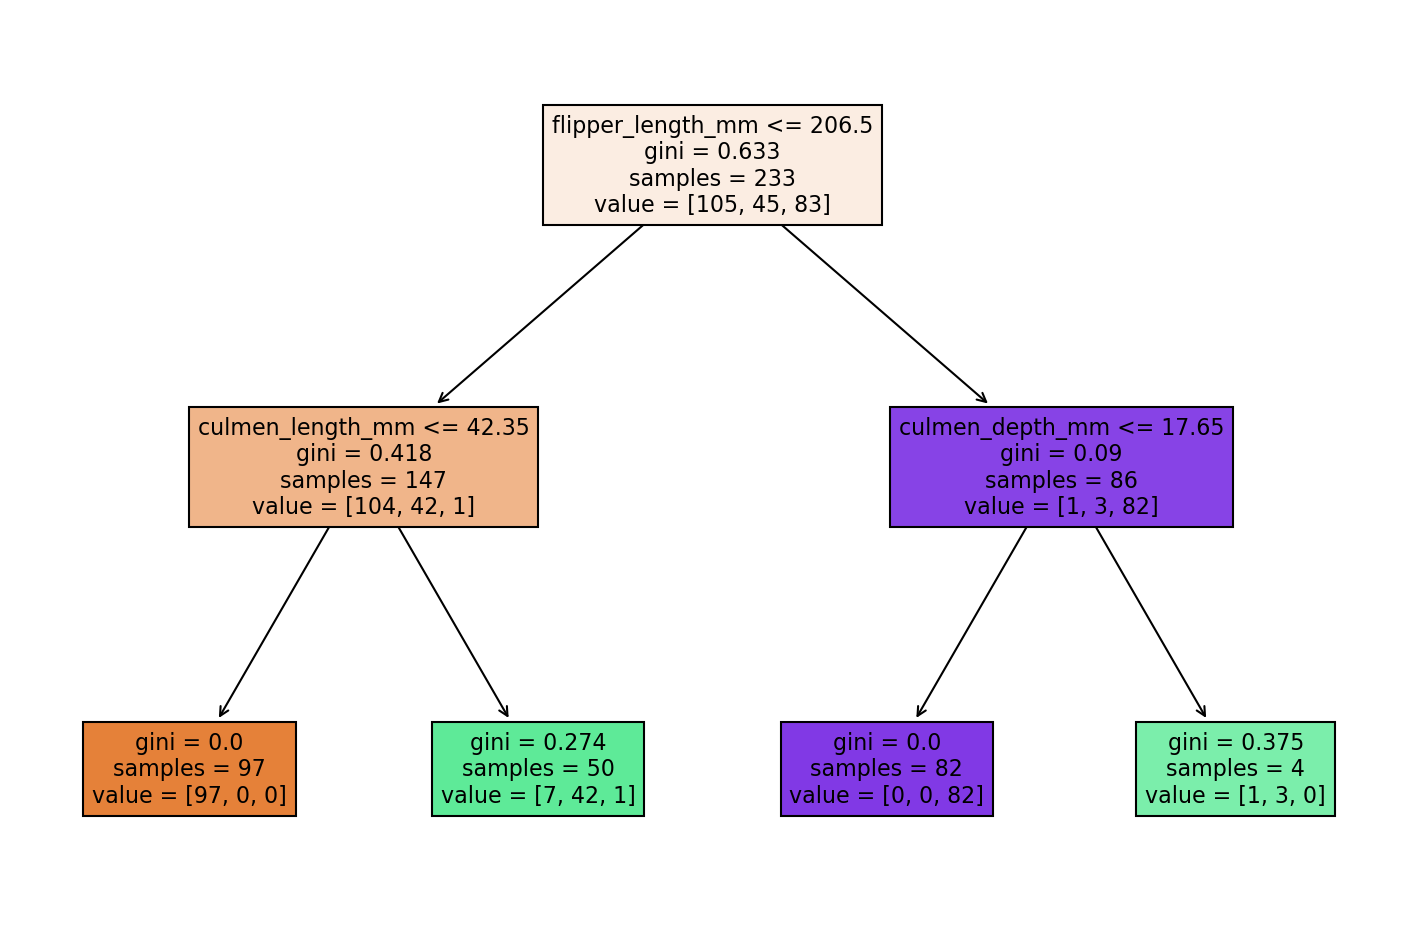

In [59]:
report_model(pruned_tree)

## Max Leaf Nodes
این پارامتر تعداد سطوح آخر را تعیین می کند یا به عبارتی بشترین تعداد برگه ها

In [60]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.83      0.87      0.85        23
      Gentoo       0.93      1.00      0.96        37

    accuracy                           0.92       101
   macro avg       0.91      0.92      0.91       101
weighted avg       0.92      0.92      0.92       101





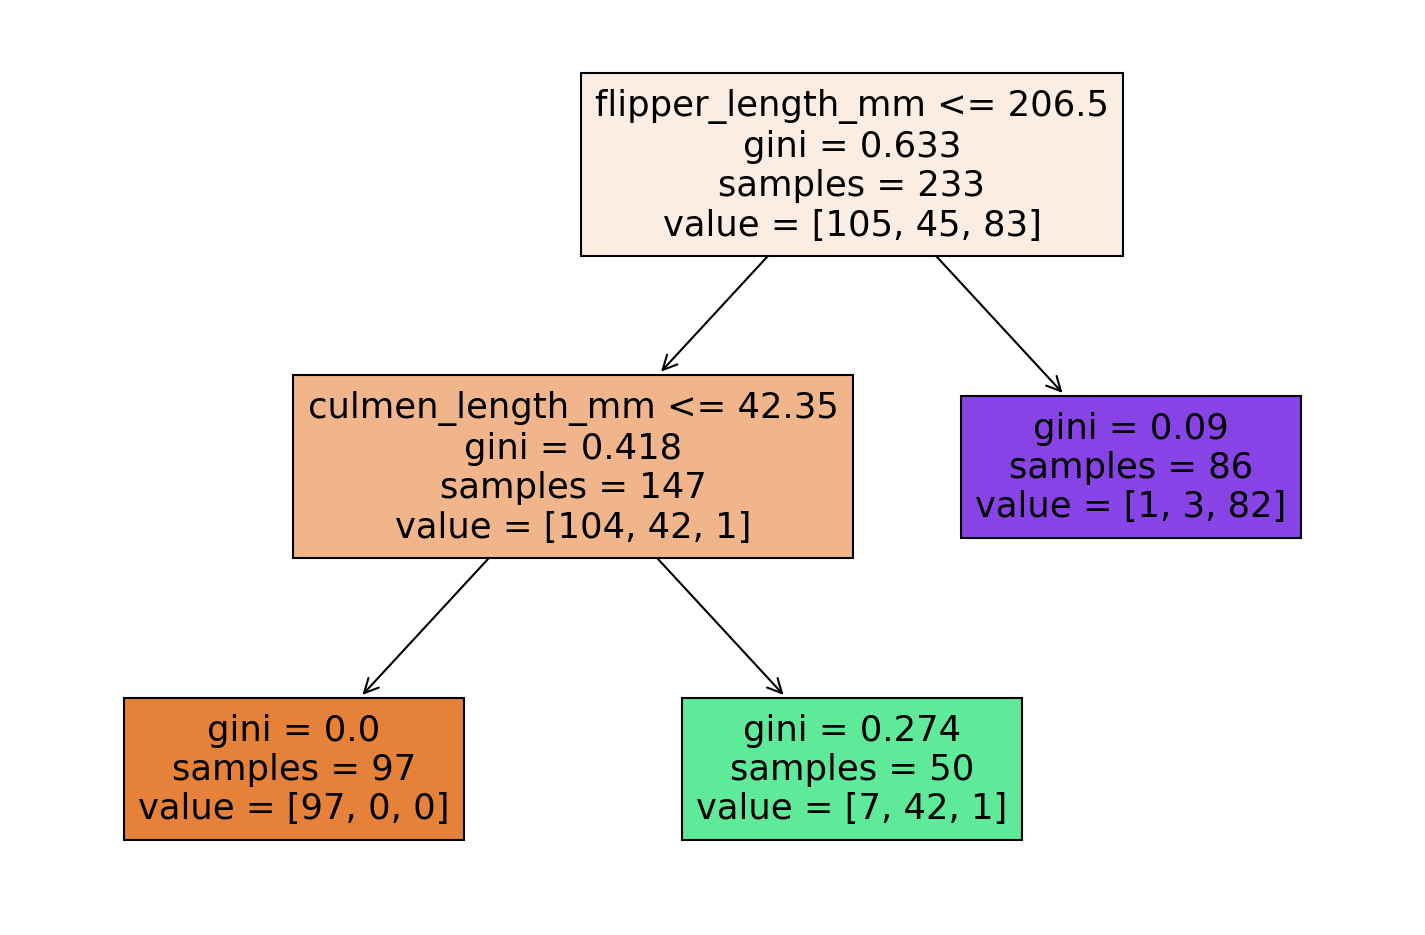

In [61]:
report_model(pruned_tree)

## Criterion

به صورت پیشفرض روی
<br>
gini impurity 
<br>
هست اما این هم به روش دیگری برای تعیین اولویت هاست

In [64]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101





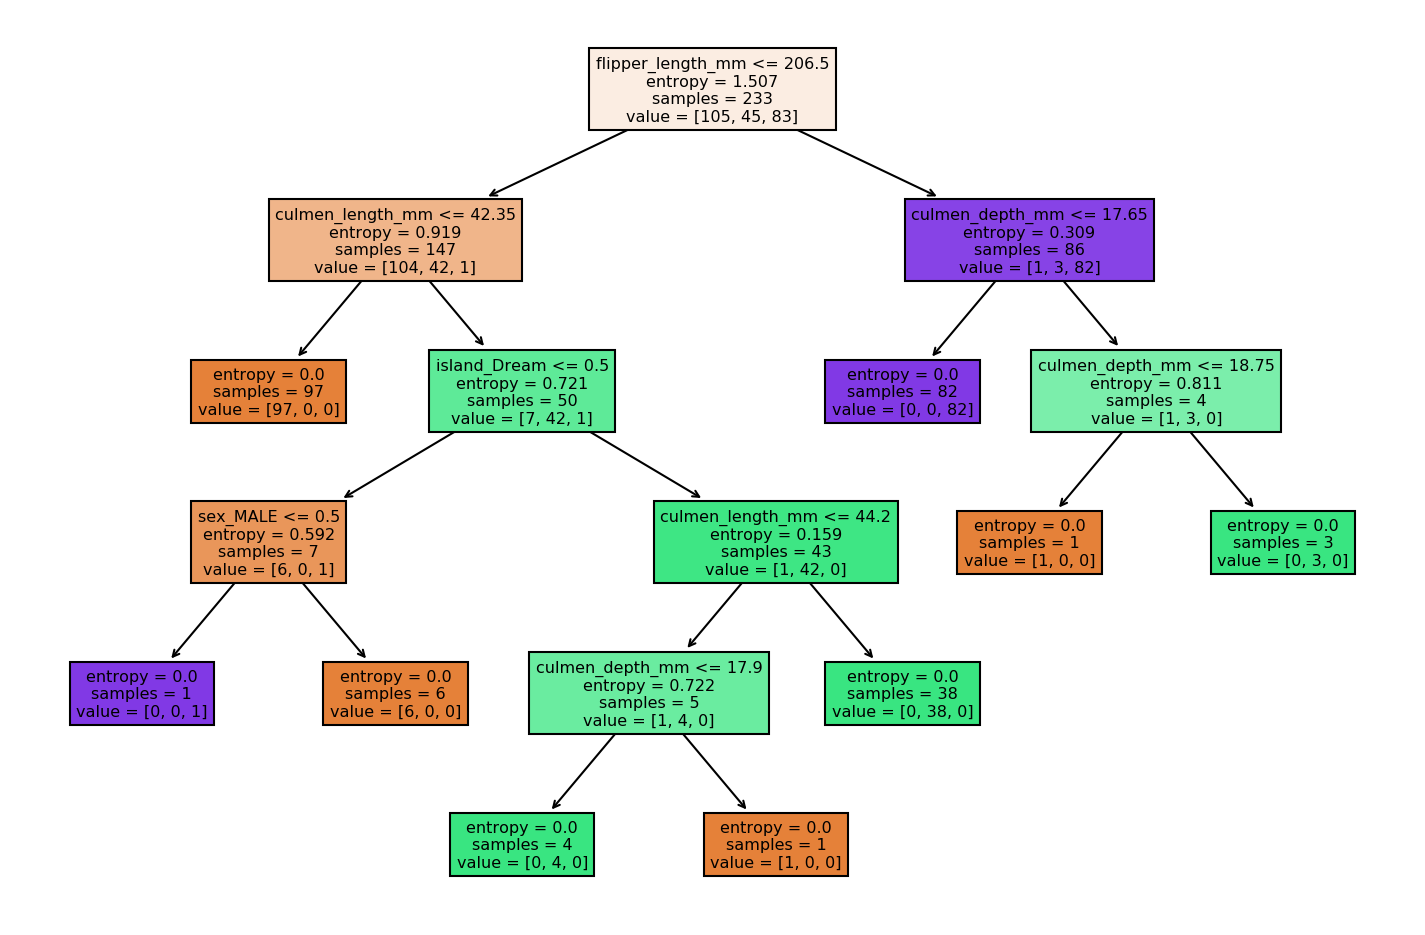

In [65]:
report_model(entropy_tree)

---